# Basic Training Loops

Training loops refer to the iterative process of training a machine learning model. In the context of deep learning, training loops involve repeatedly presenting training data to the model, making predictions, computing the loss or error between the predicted output and the actual target, and adjusting the model's parameters to minimize this loss.

- The basic steps of training loops includes
    - forward pass
    - loss computation
    - backpropagation
    - parameter updates
- This loop runs for n number of epochs

In [5]:
# uncomment to install matlplotlib package
# !pip install matplotlib -q

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

## Solving machine learning problem
Solving a machine learning problem usually consists of the following steps
- obtain training data
- define the model
- define a loss function
- forward pass and compute loss
- calculate gradient for the loss and update the parameter using optimization technique
- evaluate the result

### Create training data

In [129]:
TRUE_W = 0.4 #true weight/slope
TRUE_B = 5.0 # true bias

NUM_EXAMPLES = 200
x = tf.linspace(-2, 2, NUM_EXAMPLES)
x = tf.cast(x, tf.float32)

# let's define a function that maps x to y
def f(x):
    return TRUE_W * x + TRUE_B
# generate y and some Irreducible error 
y = f(x)
error = tf.random.normal([NUM_EXAMPLES]) * 0.3
y = y + error

In [130]:
x[:10], y[:10]

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([-2.       , -1.9798995, -1.959799 , -1.9396985, -1.919598 ,
        -1.8994975, -1.879397 , -1.8592964, -1.839196 , -1.8190955],
       dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([4.4534307, 3.9677734, 4.283556 , 4.474396 , 4.277725 , 4.2737136,
        4.255987 , 4.5939064, 4.4801626, 4.0826755], dtype=float32)>)

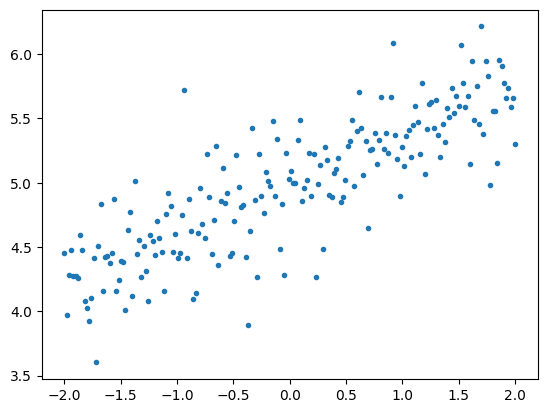

In [131]:
# plot the data
# Plot all the data
plt.plot(x, y, '.')
plt.show()

### Define a Model

In [132]:
class MyModel(tf.Module):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        
        # initialize weights
        self.w = tf.Variable(5.0)
        self.b = tf.Variable(0.0)
    
    def __call__(self, x):
        return x * self.w + self.b

model = MyModel(name="simplest_model")
model.name, model.variables

('simplest_model',
 (<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>,
  <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>))

In [133]:
# verify the model works
assert model(2.0) == tf.constant(10.0)

### Define a loss function
A loss function measures how well the output of a model for a given input matches the target output. 

In [134]:
# since it is a regression problem, let's define mse loss
def MSE(target_y, pred_y):
    return tf.reduce_mean(tf.math.square(target_y - pred_y))

In [135]:
MSE(y, y + 2)

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

### Plotting the model to see how well our untrained model is performing

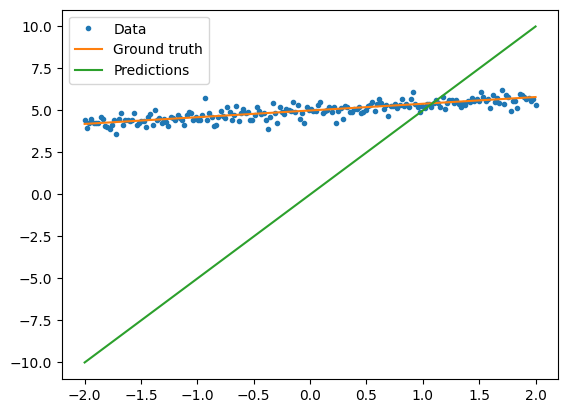

Current loss: 53.613537


In [136]:
plt.plot(x, y, '.', label="Data")
plt.plot(x, f(x), label="Ground truth")
plt.plot(x, model(x), label="Predictions")
plt.legend()
plt.show()

print("Current loss: %1.6f" % MSE(y, model(x)).numpy())

As you can see our model is no were close to capture the underlying ground truth regression line. Since, we haven't done any training yet.

### Define Training Loop

- We are using gradient descent optimization technique

In [137]:
def train(model, x, y, learning_rate):
    loss = 0
    with tf.GradientTape() as tape:
        # forward pass
        out = model(x)
        # compute loss
        loss = MSE(y, out)
    # calculate gradient with respect to the loss
    dw, db = tape.gradient(loss, [model.w, model.b])
    
    # update weight
    # w = w - lr * dw
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)
    return loss

In [156]:
model = MyModel()
# capture the history
WEIGHTS = [] 
BIASES = []

# define function to print the resule
def report(model, loss):
    print(f"W :{model.w.numpy()}, b: {model.b.numpy()} -- loss: {loss}")

# define a training loop
def training_loop(model, x, y, epochs, learning_rate):
    for i in range(epochs):
        loss = train(model, x, y, learning_rate)
        
        #save the history
        WEIGHTS.append(model.w.numpy())
        BIASES.append(model.b.numpy())
        
        print(f"Epoch: {i}", end=' ')
        report(model, loss)

In [157]:
epochs = 20
lr = 0.1
training_loop(model, x, y, epochs, lr)

Epoch: 0 W :3.755350112915039, b: 0.9954242706298828 -- loss: 53.6135368347168
Epoch: 1 W :2.845942497253418, b: 1.7917637825012207 -- loss: 31.29047393798828
Epoch: 2 W :2.181480884552002, b: 2.428835391998291 -- loss: 18.426620483398438
Epoch: 3 W :1.6959898471832275, b: 2.938492774963379 -- loss: 10.953381538391113
Epoch: 4 W :1.341264247894287, b: 3.3462185859680176 -- loss: 6.576038360595703
Epoch: 5 W :1.082082748413086, b: 3.6723992824554443 -- loss: 3.991032600402832
Epoch: 6 W :0.8927109837532043, b: 3.9333436489105225 -- loss: 2.452204942703247
Epoch: 7 W :0.7543458938598633, b: 4.142099380493164 -- loss: 1.5290565490722656
Epoch: 8 W :0.6532489657402039, b: 4.309103965759277 -- loss: 0.971180260181427
Epoch: 9 W :0.5793821811676025, b: 4.442707538604736 -- loss: 0.6317242980003357
Epoch: 10 W :0.5254111886024475, b: 4.549590110778809 -- loss: 0.4238603115081787
Epoch: 11 W :0.48597708344459534, b: 4.635096549987793 -- loss: 0.2958392798900604
Epoch: 12 W :0.4571644365787506,

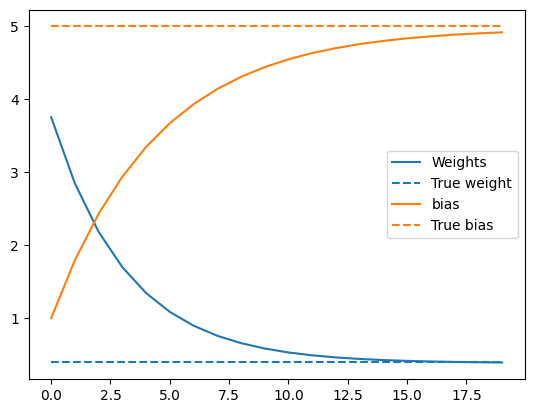

In [158]:
# plot the evolution of weight over time
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
epochs_l = range(epochs)

plt.plot(epochs_l, WEIGHTS, label='Weights', color=colors[0])
plt.plot(epochs_l, [TRUE_W] * len(epochs_l), '--',
         label = "True weight", color=colors[0])

plt.plot(epochs_l, BIASES, label='bias', color=colors[1])
plt.plot(epochs_l, [TRUE_B] * len(epochs_l), "--",
         label="True bias", color=colors[1])

plt.legend()
plt.show()

Here, we can clearly see that the weight and bias gets closer to the true weight and bias with time.

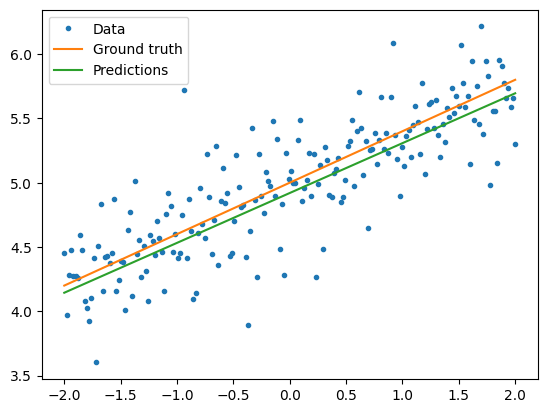

Current loss: 0.087583


In [159]:
plt.plot(x, y, '.', label="Data")
plt.plot(x, f(x), label="Ground truth")
plt.plot(x, model(x), label="Predictions")
plt.legend()
plt.show()

print("Current loss: %1.6f" % MSE(model(x), y).numpy())


**Conclusion:**
- We have successfully trained a simplest model, as you can see the true regression line is almost identical to our trained model

In [177]:
def func1(x):
    return x**2

def func2(x, y):
    return 2*x*y

In [178]:
x = tf.Variable(2.0)
y = tf.Variable(3.0)

with tf.GradientTape() as tape:
    out = func1(x)
    out2 = func2(out, y)

In [179]:
# out2 = func2(out, y)
#      = 2*out*y
#      = 2*func1(x)*y
#      = 2 *x**2*y
# dout2_x = 2*2*x*y = 2*2*2*3 = 24

dout2_x = tape.gradient(out2, x)
assert dout2_x.numpy() == 24.0

We got the result as expected

In [180]:
dout2_x

<tf.Tensor: shape=(), dtype=float32, numpy=24.0>

## Don't get confused between the graph mode and gradient tape
- The tf.function decorator converts a Python function into a TensorFlow graph operation, optimizing it for potential performance improvements.
- On the other hand, the gradient tape, represented by tf.GradientTape(), is a mechanism for automatic differentiation. 

In [198]:
@tf.function
def func(x):
    x = x*2
    print(x)
    x = x + 45
    print(x)
    return x**2
@tf.function
def func_two(x):
    return x**2

In [200]:
with tf.GradientTape() as tape:
    out = func(x)
    print(out)
    out = func_two(out)

out

tf.Tensor(2401.0, shape=(), dtype=float32)


<tf.Tensor: shape=(), dtype=float32, numpy=5764801.0>

In [201]:
tape.gradient(out, x)

<tf.Tensor: shape=(), dtype=float32, numpy=941192.0>

**Explaination:**
- When you execute a function in a graph mode, then you will not get the intermediate result
- When you enter a tf.GradientTape() context, the tape starts recording operations involving tensors. As you perform computations within the tape context, TensorFlow automatically tracks the operations and builds a dynamic computation graph.
- **tf.GradientTape()** records the operations involving tensors within its context, and when you call **tape.gradient()** with a target value and a list of variables, it uses the recorded operations to compute the gradients of the target with respect to the variables.

- Thus, in above scenario , the **tf.GradientTape()** context and the **tf.function-decorated** function operate independently.